In [1]:
import cv2    # opencv读取格式是BGR
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread('cat.jpg')

In [2]:
img

array([[[ 61,  88,  70],
        [ 73, 100,  80],
        [ 89, 117,  94],
        ...,
        [131, 134, 111],
        [133, 137, 113],
        [134, 139, 116]],

       [[ 27,  53,  37],
        [ 44,  70,  52],
        [ 66,  93,  73],
        ...,
        [129, 132, 109],
        [131, 134, 111],
        [131, 137, 113]],

       [[ 10,  35,  22],
        [ 21,  46,  33],
        [ 39,  65,  47],
        ...,
        [125, 128, 105],
        [127, 131, 107],
        [128, 133, 110]],

       ...,

       [[ 21,  46,  33],
        [ 21,  46,  33],
        [ 21,  46,  33],
        ...,
        [ 93,  81,  83],
        [ 95,  83,  85],
        [ 97,  85,  87]],

       [[ 20,  46,  30],
        [ 20,  46,  30],
        [ 20,  46,  30],
        ...,
        [ 96,  84,  86],
        [ 99,  87,  88],
        [103,  88,  91]],

       [[ 20,  46,  30],
        [ 20,  46,  30],
        [ 20,  46,  30],
        ...,
        [100,  88,  90],
        [101,  89,  91],
        [103,  88,  91]]

In [3]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
img.shape

(500, 753, 3)

In [6]:
img = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
img

array([[ 80,  91, 107, ..., 127, 129, 132],
       [ 45,  62,  84, ..., 125, 127, 129],
       [ 28,  39,  57, ..., 121, 123, 126],
       ...,
       [ 39,  39,  39, ...,  83,  85,  87],
       [ 38,  38,  38, ...,  86,  89,  91],
       [ 38,  38,  38, ...,  90,  91,  91]], dtype=uint8)

In [7]:
img.shape

(500, 753)

In [8]:
cv_show('cat.jpg', img)

In [9]:
# 保存
cv2.imwrite('mycat.png', img)

True

In [10]:
type(img)

numpy.ndarray

In [11]:
img.size

376500

In [12]:
img.dtype

dtype('uint8')

<font size=3>数据读取-视频

In [13]:
vc = cv2.VideoCapture('Kevin.mp4')

In [14]:
# 检查是否打开正确
if vc.isOpened():
    open, frame = vc.read()
else:
    open = false

In [15]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        if cv2.getWindowProperty('result', cv2.WND_PROP_VISIBLE) < 1:
            break
    if cv2.waitKey(30) == 27:
        break
vc.release()
cv2.destroyAllWindows()

<font size=3>截取部分图像数据

In [16]:
img = cv2.imread('cat.jpg')
cat = img[0:50, 0:200]
cv_show('cat', cat)

颜色通道提取

In [17]:
b, g, r = cv2.split(img)

In [18]:
b

array([[ 61,  73,  89, ..., 131, 133, 134],
       [ 27,  44,  66, ..., 129, 131, 131],
       [ 10,  21,  39, ..., 125, 127, 128],
       ...,
       [ 21,  21,  21, ...,  93,  95,  97],
       [ 20,  20,  20, ...,  96,  99, 103],
       [ 20,  20,  20, ..., 100, 101, 103]], dtype=uint8)

In [19]:
b.shape

(500, 753)

In [20]:
img = cv2.merge((b, g, r))
img.shape

(500, 753, 3)

In [21]:
# 只保留R
cur_img = img.copy()
cur_img[:, :, 0] = 0
cur_img[:, :, 1] = 0
cv_show('R', cur_img)

In [22]:
# 只保留G
cur_img = img.copy()
cur_img[:, :, 0] = 0
cur_img[:, :, 2] = 0
cv_show('R', cur_img)

In [23]:
# 只保留B
cur_img = img.copy()
cur_img[:, :, 1] = 0
cur_img[:, :, 2] = 0
cv_show('R', cur_img)

In [24]:
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_CONSTANT, value = 0)

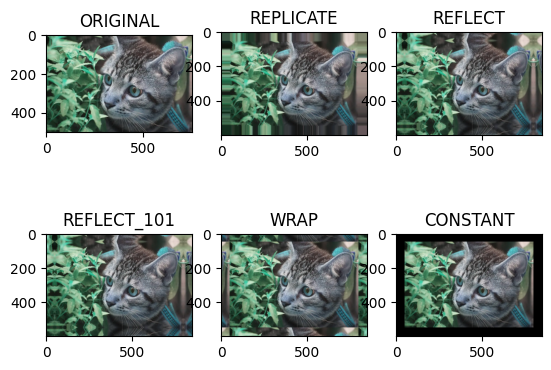

In [25]:
import matplotlib.pyplot as plt
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')

plt.show()

数值计算

In [26]:
img_cat = cv2.imread('cat.jpg')
img_dog = cv2.imread('dog.jpg')

In [27]:
img_cat2 = img_cat + 10
img_cat[:5, :, 0]

array([[ 61,  73,  89, ..., 131, 133, 134],
       [ 27,  44,  66, ..., 129, 131, 131],
       [ 10,  21,  39, ..., 125, 127, 128],
       [ 18,  20,  24, ..., 120, 123, 122],
       [ 13,  15,  19, ..., 115, 116, 116]], dtype=uint8)

In [28]:
img_cat2[:5, :, 0]

array([[ 71,  83,  99, ..., 141, 143, 144],
       [ 37,  54,  76, ..., 139, 141, 141],
       [ 20,  31,  49, ..., 135, 137, 138],
       [ 28,  30,  34, ..., 130, 133, 132],
       [ 23,  25,  29, ..., 125, 126, 126]], dtype=uint8)

In [29]:
(img_cat + img_cat2)[:5, :, 0]

array([[132, 156, 188, ...,  16,  20,  22],
       [ 64,  98, 142, ...,  12,  16,  16],
       [ 30,  52,  88, ...,   4,   8,  10],
       [ 46,  50,  58, ..., 250,   0, 254],
       [ 36,  40,  48, ..., 240, 242, 242]], dtype=uint8)

In [30]:
cv2.add(img_cat, img_cat2)[:5, :, 0]

array([[132, 156, 188, ..., 255, 255, 255],
       [ 64,  98, 142, ..., 255, 255, 255],
       [ 30,  52,  88, ..., 255, 255, 255],
       [ 46,  50,  58, ..., 250, 255, 254],
       [ 36,  40,  48, ..., 240, 242, 242]], dtype=uint8)

图像融合

In [31]:
img_cat.shape

(500, 753, 3)

In [32]:
img_dog.shape

(1200, 1920, 3)

In [33]:
img_dog = cv2.resize(img_dog, (753, 500))
img_dog.shape

(500, 753, 3)

In [34]:
res = cv2.addWeighted(img_cat, 0.4, img_dog, 0.6, 0)

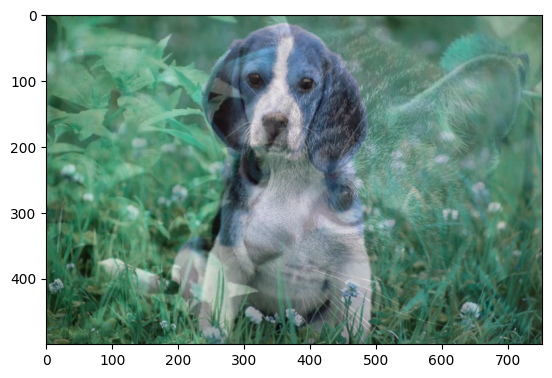

In [35]:
plt.imshow(res)

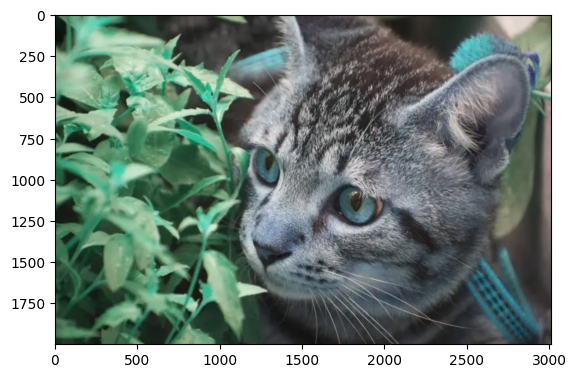

In [36]:
res = cv2.resize(img, (0, 0), fx = 4, fy = 4)
plt.imshow(res)

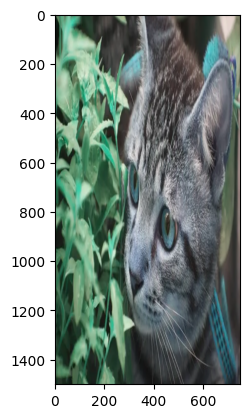

In [37]:
res = cv2.resize(img, (0, 0), fx = 1, fy = 3)
plt.imshow(res)

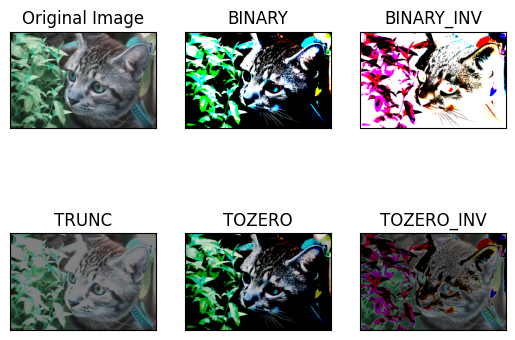

In [38]:
img_gray = cv2.imread('cat.jpg')

ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

In [39]:
img = cv2.imread('lenaNoise.png')

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
# 均值滤波
# 简单的平均卷积操作
blur = cv2.blur(img, (3, 3))

cv2.imshow('blur', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
# 方框滤波
# 基本和均值一样，可以选择归一化
box = cv2.boxFilter(img, -1, (3, 3), normalize = True)

cv2.imshow('box', box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [42]:
# 方框滤波
# 基本和均值一样，可以选择归一化，容易越界
box = cv2.boxFilter(img, -1, (3, 3), normalize = False)

cv2.imshow('box', box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
# 高斯滤波
gaussian = cv2.GaussianBlur(img, (5, 5), 1)

cv2.imshow('gaussian', gaussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
# 中值滤波
median = cv2.medianBlur(img, 5)

cv2.imshow('median', median)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [45]:
# 批量展示
res = np.hstack((blur, gaussian, median))
print(res)
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[[125 137 226]
  [128 137 225]
  [129 137 224]
  ...
  [122 145 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [128 137 225]
  [129 137 224]
  ...
  [122 145 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [128 137 225]
  [129 137 224]
  ...
  [122 145 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 81  47 103]
  [ 81  50 106]
  [ 60  25  90]
  ...
  [ 79  67 173]
  [ 79  67 174]
  [ 81  68 177]]

 [[ 80  47 102]
  [ 81  50 106]
  [ 74  26  90]
  ...
  [ 81  70 177]
  [ 81  70 177]
  [ 81  71 179]]

 [[ 57  22  82]
  [ 59  25  87]
  [ 75  27  90]
  ...
  [ 81  71 177]
  [ 81  71 179]
  [ 81  73 181]]]


形态学-腐蚀操作

In [46]:
img = cv2.imread('dige.png')

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [47]:
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
cv2.imshow('erosion', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [48]:
pie = cv2.imread('pie.png')

cv2.imshow('pie', pie)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
kernel = np.ones((30, 30), np.uint8)
erosion_1 = cv2.erode(pie, kernel, iterations = 1)
erosion_2 = cv2.erode(pie, kernel, iterations = 2)
erosion_3 = cv2.erode(pie, kernel, iterations = 3)

res = np.hstack((erosion_1, erosion_2, erosion_3))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

形态学-膨胀操作

In [50]:
img = cv2.imread('dige.png')

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
kernel = np.ones((3, 3), np.uint8)
dige_erosion = cv2.erode(img, kernel, iterations = 1)
cv2.imshow('dige_erosion', dige_erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [52]:
kernel = np.ones((3, 3), np.uint8)
dige_dilate = cv2.dilate(dige_erosion, kernel, iterations = 1)
cv2.imshow('dige_dilate', dige_dilate)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [53]:
pie = cv2.imread('pie.png')
kernel = np.ones((30, 30), np.uint8)
dilate_1 = cv2.dilate(pie, kernel, iterations = 1)
dilate_2 = cv2.dilate(pie, kernel, iterations = 2)
dilate_3 = cv2.dilate(pie, kernel, iterations = 3)

res = np.hstack((dilate_1, dilate_2, dilate_3))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

开运算与闭运算

In [54]:
# 开：先腐蚀，再膨胀
img = cv2.imread('dige.png')
kernel = np.ones((5, 5), np.uint8)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
cv2.imshow('opening', opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [55]:
# 闭：先膨胀，再腐蚀
img = cv2.imread('dige.png')
kernel = np.ones((5, 5), np.uint8)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
cv2.imshow('closing', closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

梯度运算

In [56]:
# 梯度=膨胀-腐蚀
pie = cv2.imread('pie.png')
kernel = np.ones((7, 7), np.uint8)
dilate = cv2.dilate(pie, kernel, iterations = 5)
erosion = cv2.erode(pie, kernel, iterations = 5)

res = np.hstack((dilate, erosion))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [57]:
gradient = cv2.morphologyEx(pie, cv2.MORPH_GRADIENT, kernel)

cv2.imshow('gradient', gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()

礼帽和黑帽

In [58]:
# 礼帽
img = cv2.imread('dige.png')
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
cv2.imshow('tophat', tophat)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [59]:
# 黑帽
img = cv2.imread('dige.png')
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
cv2.imshow('blackhat', blackhat)
cv2.waitKey(0)
cv2.destroyAllWindows()

图像梯度-Sobel算子

In [60]:
img = cv2.imread('pie.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [61]:
def cv_show(img, name):
    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [62]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)
cv_show(sobelx, 'sobelx')

In [63]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)
sobelx = cv2.convertScaleAbs(sobelx)
cv_show(sobelx, 'sobelx')

In [64]:
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 3)
sobely = cv2.convertScaleAbs(sobely)
cv_show(sobely, 'sobely')

对x,y方向的结果求和

In [65]:
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
cv_show(sobelxy, 'sobelxy')

不建议直接计算

In [66]:
sobelxy = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize = 3)
sobelxy = cv2.convertScaleAbs(sobelxy)
cv_show(sobelxy, 'sobelxy')

原神妮露美图-sobel算子

In [67]:
img = cv2.imread('Nilou.jpg', cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
cv_show(sobelxy, 'sobelxy')

In [68]:
# 不同算子的差异
scharrx = cv2.Scharr(img, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(img, cv2.CV_64F, 0, 1)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx, 0.5, scharry, 0.5, 0)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

res = np.hstack((sobelxy, scharrxy, laplacian))
cv_show(res, 'res')

In [69]:
img = cv2.imread("Nilou.jpg", cv2.IMREAD_GRAYSCALE)
v1 = cv2.Canny(img, 80, 150)
v2 = cv2.Canny(img, 50, 100)
res = np.hstack((v1, v2))
cv_show(res, 'res')

图像金字塔

In [70]:
img = cv2.imread('Shenhe.jpg')
cv_show(img, 'img')
print(img.shape)

(1056, 700, 3)


In [71]:
up = cv2.pyrUp(img)
cv_show(up, 'up')
print(up.shape)

(2112, 1400, 3)


In [72]:
down = cv2.pyrDown(img)
cv_show(down, 'down')
print(down.shape)

(528, 350, 3)


拉普拉斯金字塔

In [73]:
down_up = cv2.pyrUp(down)
lpls = img-down_up
cv_show(lpls,'lpls')

图像轮廓

In [74]:
img = cv2.imread('hehe.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cv_show(thresh, 'thresh')

In [75]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

绘制轮廓

In [76]:
# 传入图像、轮廓、轮廓索引、颜色模式、线条厚度
draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, -1, (255, 0, 255), 2)
cv_show(res, 'res')

轮廓特征

In [77]:
cnt = contours[0]

In [78]:
# 面积
cv2.contourArea(cnt)

0.0

In [79]:
# 周长
cv2.arcLength(cnt, True)

4.0

轮廓近似

In [80]:
img = cv2.imread('contours2.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

draw_img = img.copy()
res = cv2.drawContours(draw_img, cnt, -1, (0, 0, 255), 2)
cv_show(res, 'res')

In [81]:
epsilon = 0.1 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)

draw_img = img.copy()
res = cv2.drawContours(draw_img,[approx], -1, (0, 0, 255), 2)
cv_show(res, 'res')

边界矩形

In [82]:
img = cv2.imread('contours.png')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]

x, y, w, h = cv2.boundingRect(cnt)
img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
cv_show(img, 'img')

In [83]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
rect_area = w * h
extent = float(area) / rect_area
print('轮廓面积与边界矩形比', extent)

轮廓面积与边界矩形比 0.5154317244724715


外接圆

In [84]:
(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
img = cv2.circle(img, center, radius, (0, 255, 0), 2)
cv_show(img, 'img')